In [1]:
import pandas as pd
import numpy as np

In [13]:
uni_data_df = pd.read_csv('../nba_forecast/data/last_ncaa_season.csv')

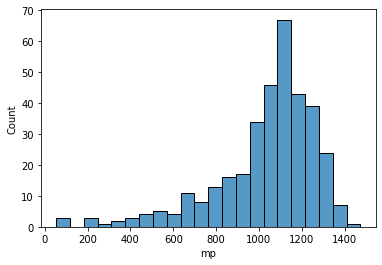

In [15]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.histplot(uni_data_df['mp'])
scaler = StandardScaler()
scaler.fit(uni_data_df[['mp']]) # Fit scaler to data

uni_data_df['mp'] = scaler.transform(uni_data_df[['mp']]) # Use scaler to transform data

In [16]:
test_df=uni_data_df.drop(columns=['school_name','conf_abbr'])

In [17]:
test_df = test_df.fillna(-1)

KMEANS

In [18]:
# Fit a K-MEANS
X_proj = test_df.drop(columns=['player_name', 'season'])
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X_proj)

KMeans(n_clusters=2)

In [19]:
km.cluster_centers_.shape

(2, 25)

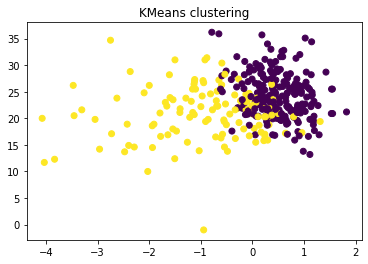

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X_proj.iloc[:,2], X_proj.iloc[:,3], c=km.labels_)
plt.title('KMeans clustering');

In [35]:
len(X_proj.columns)

25

PCA

In [25]:
#⚠️ Data must be centered around their mean before apply PCA ⚠️
scaler = StandardScaler()
scaler.fit(X_proj)
X_standard = pd.DataFrame(scaler.transform(X_proj), columns=X_proj.columns)
X_standard

,g,gs,mp,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,...,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,years
0,1.207140,1.030049,1.024153,2.525748,1.674334,1.739023,-1.216075,1.308850,0.432372,1.179787,...,-1.465360,-1.243756,2.040677,3.224170,2.862810,2.529518,1.552831,3.019503,2.862665,-1.198434
1,1.207140,0.920456,0.874748,-0.402413,-0.140128,-0.551875,-0.681296,1.217193,0.088357,0.864657,...,0.996551,-0.845618,0.228784,1.087305,0.621517,0.087269,-0.404660,0.474381,-0.064612,-1.198434
2,0.640940,0.701270,0.966051,-0.233886,-0.032124,-0.277751,1.066387,0.166662,0.250628,-0.468586,...,0.147616,-0.314767,0.373735,0.375017,0.449110,-0.161095,0.104288,0.078473,0.151082,-1.198434
3,0.640940,-3.353669,-0.594406,0.671948,-0.248132,-0.101528,0.206328,-0.601847,-0.346530,-1.050365,...,-0.955999,0.503628,0.083832,-0.194814,0.046827,0.728877,0.339187,1.153080,0.890605,-0.358813
4,1.018406,0.920456,0.862297,0.903673,-0.593743,-0.532295,-1.392497,0.321774,1.146365,1.058583,...,0.119319,1.233548,0.446211,2.369424,1.311146,0.894453,0.104288,0.361264,0.274336,0.480809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.452207,0.372491,-0.162790,0.524487,-0.183329,0.211758,-1.232615,-0.552493,-0.203731,1.567639,...,-0.078766,-0.336886,-0.495973,0.802390,-0.068111,0.107967,-0.404660,0.757172,0.089456,0.480809
347,-0.113993,-0.613845,0.123570,0.124235,-0.507340,-0.434393,0.757648,-1.123587,0.912694,0.307119,...,-0.276851,1.454736,-0.351022,0.232559,-0.183050,-0.285277,-0.013161,-1.335484,-0.742507,1.320431
348,-0.113993,0.262898,0.256375,-0.592006,0.011077,0.250918,0.305566,-1.708782,-0.450383,0.573767,...,-1.465360,-1.487063,-0.206071,-0.194814,-0.240519,-0.533641,-0.248060,-0.826460,-0.650067,1.320431
349,-0.302726,0.043712,-0.503102,-0.907994,-0.053725,0.055115,1.171137,-1.010779,-0.645109,0.113193,...,0.373999,-0.248411,-1.003304,-0.764645,-1.102554,-1.154552,-0.757008,-0.656785,-0.989015,1.320431


<AxesSubplot:>

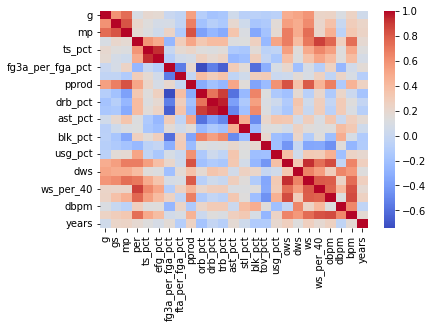

In [26]:
sns.heatmap(pd.DataFrame(X_proj).corr(), cmap='coolwarm')

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_standard)

PCA()

In [33]:
# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=X_proj.columns,
                 columns=[f'PC{i}' for i in range(1, 26)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
g,-0.188043,-0.050467,0.169443,-0.463204,0.089372,-0.012495,0.124026,0.025164,-0.144348,0.018980,...,0.516418,0.036220,-0.093244,0.035610,0.041861,0.034189,-0.039234,-0.006567,-0.005070,-0.003540
gs,-0.220440,-0.086757,0.179944,-0.342625,-0.110661,0.005369,-0.111547,-0.087449,0.079720,-0.219770,...,0.402140,0.049575,0.064773,0.035948,0.025266,-0.015322,-0.014825,-0.004052,-0.003613,0.000483
mp,-0.252619,-0.167694,0.174549,-0.321501,-0.067001,-0.004847,-0.030762,-0.062398,0.064674,-0.053675,...,-0.411934,-0.148870,-0.162445,-0.157301,-0.604606,0.074958,0.243655,-0.000842,0.031755,0.016889
per,-0.270175,0.206337,-0.104083,0.206759,-0.151602,-0.063157,0.029768,-0.049800,-0.113301,-0.159089,...,0.132497,0.015155,-0.227238,-0.130319,-0.348102,-0.247969,-0.679632,-0.028140,0.002751,-0.020852
ts_pct,-0.194724,0.154935,-0.329075,-0.057900,0.291791,-0.310042,-0.081489,-0.074252,0.094001,-0.086560,...,0.020827,0.018475,-0.008057,-0.574007,0.132986,0.462345,-0.012118,0.013603,0.011867,0.006842
efg_pct,-0.143598,0.186922,-0.337447,-0.119028,0.324445,-0.241497,-0.119626,-0.237499,0.031025,-0.193666,...,-0.066527,-0.318292,0.120162,0.534897,-0.070594,-0.222964,0.076283,-0.001939,-0.003814,-0.003818
fg3a_per_fga_pct,-0.050841,-0.313029,-0.178149,0.100584,0.211843,0.213835,-0.079594,-0.159991,0.184072,0.133814,...,0.187984,-0.221374,0.121834,0.044565,-0.119073,-0.027855,-0.112265,0.001643,0.008427,-0.002009
fta_per_fga_pct,-0.018434,0.205529,0.170749,0.062163,-0.124277,-0.470503,0.190044,0.595093,0.229713,0.066060,...,0.040310,-0.201012,-0.026817,0.137948,-0.003375,-0.023553,-0.009369,-0.004766,-0.000570,-0.003323
pprod,-0.297430,-0.139016,0.064102,-0.069136,-0.255798,-0.126370,0.043064,-0.131887,-0.074052,-0.064196,...,-0.216604,-0.173122,0.383442,-0.316833,0.438334,-0.467990,-0.005197,0.030352,-0.003204,-0.003701
orb_pct,0.052227,0.374167,-0.018854,-0.087959,-0.168644,0.030128,0.064402,-0.023382,0.102557,-0.136308,...,-0.024568,-0.316126,0.269438,-0.045471,-0.094772,0.196231,-0.022800,0.336226,0.030588,0.024137


In [34]:
X_proj_pca = pca.transform(X_standard)
X_proj_pca = pd.DataFrame(X_proj_pca, columns=[f'PC{i}' for i in range(1, 26)])
X_proj_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-6.208325,6.057187,1.306330,-0.895914,2.181347,1.414468,1.622595,0.576359,-0.692924,-0.231929,...,-0.386880,-0.108372,-0.285304,0.375544,0.216326,0.233558,-0.247383,-0.038339,-0.003191,0.020865
1,-0.369463,1.016073,1.967578,-1.945901,0.028589,-0.616343,1.133732,0.228185,0.740705,0.417445,...,-0.131949,0.313032,0.055504,-0.089692,-0.168974,0.094101,-0.040341,-0.008699,-0.010773,0.005209
2,-0.757493,-0.530182,0.761294,-0.824088,0.309529,0.338109,0.885153,-0.745959,0.928291,0.154728,...,0.084305,0.269479,-0.161010,0.044305,-0.168128,0.031803,0.016696,0.057143,0.030638,0.004564
3,-0.454702,-1.221752,0.222961,3.237792,1.964319,0.727701,1.433352,0.655961,-0.568612,-0.911493,...,-0.279119,0.240936,-0.303936,0.009037,-0.252176,-0.039252,-0.049061,-0.002054,0.010078,-0.051279
4,-2.512437,2.738219,2.081854,-0.935529,-2.673240,1.060551,-0.662783,-0.721483,0.846200,0.646648,...,-0.046389,0.239823,-0.013121,0.046911,0.166222,-0.073780,0.032504,0.017890,-0.003886,-0.004246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.061897,2.364851,1.130064,-0.401966,-0.043157,0.975338,-0.622206,-0.300099,-0.003404,-1.312559,...,0.267169,-0.183209,0.108747,-0.163444,0.077903,0.009573,-0.064451,-0.035477,-0.004077,-0.007413
347,0.124269,-0.873696,-0.649268,0.301184,-1.992722,0.881422,-1.376570,-0.759704,0.053821,-0.266270,...,-0.213013,-0.517007,-0.082924,-0.231158,0.250710,-0.111528,0.051502,-0.013275,-0.002895,-0.006012
348,0.967843,0.465316,-1.574012,-1.725498,-0.335861,2.115087,-1.674451,-0.342709,1.119381,0.480999,...,0.110889,-0.329140,0.075446,-0.261477,0.124334,0.089790,0.022070,-0.029254,-0.005458,-0.008230
349,2.488228,-0.248710,-1.177232,-0.855106,-0.380768,0.723908,-2.105530,-0.755411,0.511493,0.428511,...,0.450854,-0.073043,0.253991,-0.129221,-0.019377,-0.014241,-0.123843,-0.010133,-0.016887,-0.006042


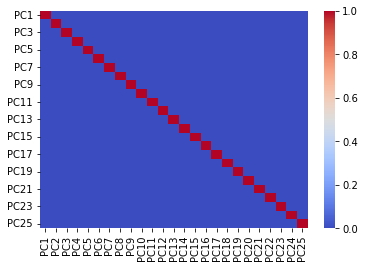

In [36]:
sns.heatmap(X_proj_pca.corr(), cmap='coolwarm');

In [37]:
# Let's compute it
X_proj_pca.std()**2 / ((X_standard.std()**2).sum())

PC1     0.309869
PC2     0.219822
PC3     0.090517
PC4     0.083057
PC5     0.067847
PC6     0.052678
PC7     0.038436
PC8     0.027352
PC9     0.022876
PC10    0.017327
PC11    0.015472
PC12    0.014722
PC13    0.009894
PC14    0.008486
PC15    0.006888
PC16    0.004984
PC17    0.003639
PC18    0.002813
PC19    0.001261
PC20    0.000871
PC21    0.000780
PC22    0.000320
PC23    0.000051
PC24    0.000022
PC25    0.000016
dtype: float64

> 31% of the dataset’s variance lies along the first axis

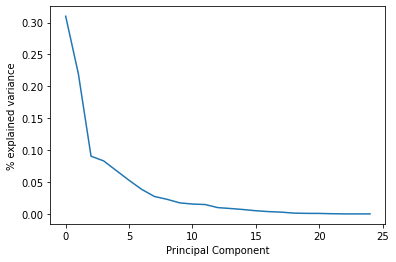

In [39]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

Choose k

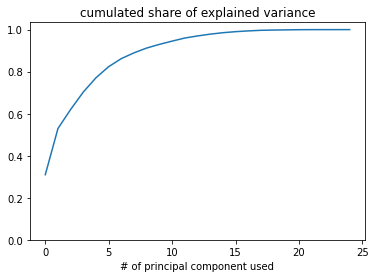

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [42]:
# Fit a PCA with only 4 components
pca4 = PCA(n_components=4).fit(X_standard)

# Project your data into 3 dimensions
X_proj4 = pd.DataFrame(pca4.fit_transform(X_standard), columns=['PC1', 'PC2', 'PC3','PC4'])

# We have "compressed" our dataset in 3D
X_proj4

,PC1,PC2,PC3,PC4
0,-6.208325,6.057187,1.306330,-0.895914
1,-0.369463,1.016073,1.967578,-1.945901
2,-0.757493,-0.530182,0.761294,-0.824088
3,-0.454702,-1.221752,0.222961,3.237792
4,-2.512437,2.738219,2.081854,-0.935529
...,...,...,...,...
346,0.061897,2.364851,1.130064,-0.401966
347,0.124269,-0.873696,-0.649268,0.301184
348,0.967843,0.465316,-1.574012,-1.725498
349,2.488228,-0.248710,-1.177232,-0.855106
